<a href="https://colab.research.google.com/github/ParthPatil07/Codsoft/blob/main/IRIS_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import  numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/codsoft/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#preprocessing the dataset

#checking null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
#to display no. of samples on each  class
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<Axes: >

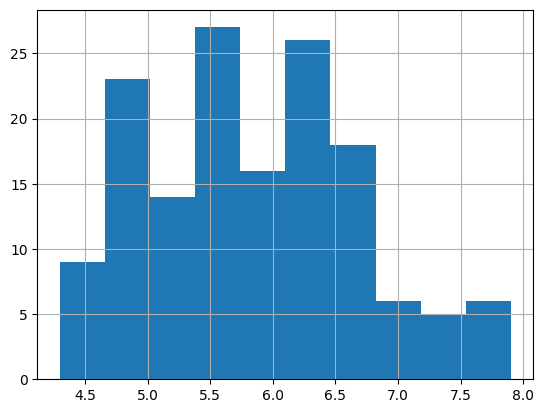

In [ ]:
#all histograms
df['sepal_length'].hist()


<Axes: >

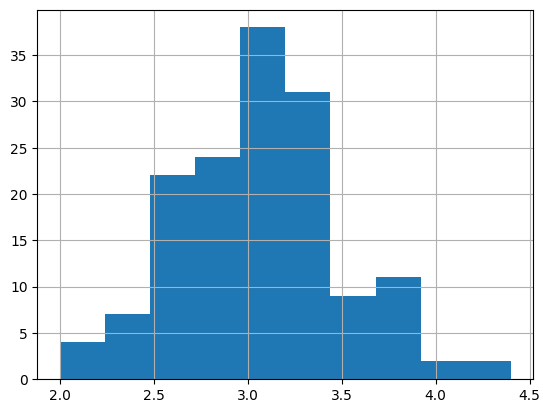

In [ ]:
df['sepal_width'].hist()

<Axes: >

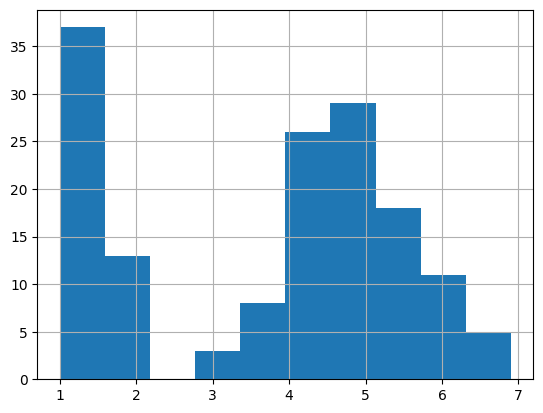

In [ ]:
df['petal_length'].hist()

<Axes: >

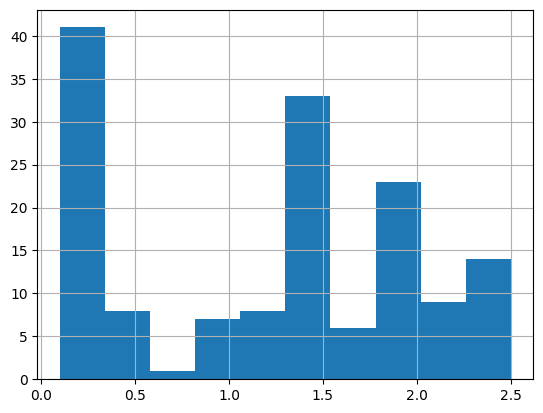

In [ ]:
df['petal_width'].hist()

In [ ]:
fig = px.scatter(df, x="sepal_length", y="sepal_width", color="species",width=800,height=499)
fig.show()

In [ ]:
fig = px.scatter(df, x="sepal_width", y="sepal_length", facet_col="species")
fig.update_xaxes(title_font=dict(size=18, family='Courier', color='crimson'))
fig.update_yaxes(title_font=dict(size=18, family='Courier', color='crimson'))

fig.show()

In [ ]:
fig = px.scatter(df, x="petal_width", y="petal_length", facet_col="species")
fig.update_xaxes(title_font=dict(size=15, family='Courier', color='crimson'),dtick=0.5)
fig.update_yaxes(title_font=dict(size=15, family='Courier', color='crimson'),dtick=0.5)

fig.show()

In [ ]:
#coorelation matrix
df.corr()


<ipython-input-15-21683e93c417>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<ipython-input-16-5c66e762fb4f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

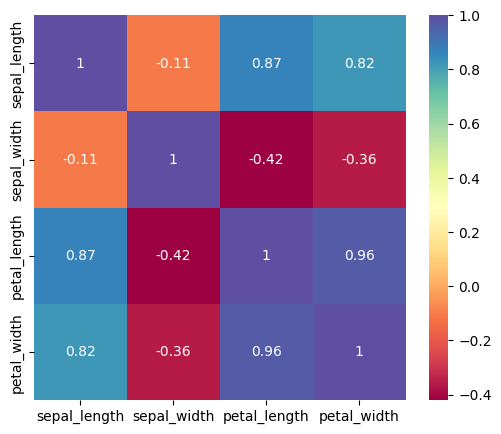

In [ ]:
corr=df.corr()
fig, ax=plt.subplots(figsize=(6,5))
sns.heatmap(corr,annot=True,ax=ax,cmap='Spectral')


In [ ]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [ ]:
df['species']=le.fit_transform(df['species'])
df['species'].unique()
#Here species labeled as following: Iris-setosa - 0 , Iris-versicolor - 1 , Iris-virginica - 2

array([0, 1, 2])

In [ ]:
#model training
from sklearn.model_selection import train_test_split
#train - 85%
#test - 15%
X=df.drop(columns=['species'])
Y=df['species']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15)


In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()


In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
#metrics to get performance
print('Accuracy',model.score(X_test,Y_test)*100)


Accuracy 100.0


In [ ]:
#using K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier()


In [ ]:
model1.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
#metrics to get performance
print('Accuracy',model1.score(X_test,Y_test)*100)

Accuracy 100.0


**So lets give input and try to classify iris flower species**

In [ ]:
exadata={'sepal_length':4.5,'sepal_width':3.2,'petal_length':1.3,'petal_width':0.2}
exdt=pd.DataFrame(exadata,index=[0])

In [ ]:
pred = model1.predict(exdt)
if pred==0:
  print("Iris-setosa")
elif pred==1:
  print("Iris-versicolor")
else :
  print("Iris-virginica")

Iris-setosa
